In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect
sys.path.insert(0,"..")  # Adds the repo to the path.
sys.path.insert(0,"../..")
#from datasets.XRay import JointDataset
import datasets
import datasets.xray
import json
import collections
import numpy as np
import h5py
import ntpath
import matplotlib.pyplot as plt
sys.path.insert(0,"../../../torchxrayvision")
import torchxrayvision as xrv

In [18]:
!mkdir $SLURM_TMPDIR/NIH/
!rsync /lustre04/scratch/cohenjos/NIH/images-224.tar $SLURM_TMPDIR/NIH/images-224.tar
!cd $SLURM_TMPDIR/NIH/; tar xf images-224.tar

In [21]:
!echo $SLURM_TMPDIR

/localscratch/cohenjos.10222373.0


In [23]:
d_nih = xrv.datasets.NIH_Dataset(#imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/ChestXray-NIHCC/images",
                                 #imgpath="/lustre04/scratch/cohenjos/NIH/images-224",
                                 imgpath="/localscratch/cohenjos.10222373.0/NIH/images-224",
                                views=["PA","AP"], unique_patients=False)


In [24]:
xrv.datasets.default_pathologies 

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [25]:
xrv.datasets.relabel_dataset(["Cardiomegaly"], d_nih)

{'Fibrosis', 'Hernia', 'Infiltration', 'Nodule', 'Pneumothorax', 'Effusion', 'Consolidation', 'Emphysema', 'Mass', 'Pleural_Thickening', 'Pneumonia', 'Atelectasis', 'Edema'} will be dropped


In [26]:
sample = d_nih[0]

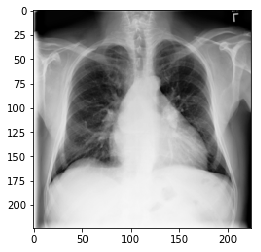

In [27]:
plt.imshow(sample["img"][0], cmap="Greys_r");

In [28]:
d_nih.labels.shape

(112120, 1)

In [29]:
textnih = datasets.xray.XRayDatasetTextDataset(d_nih)

In [30]:
sample, seg, labs = textnih[0]

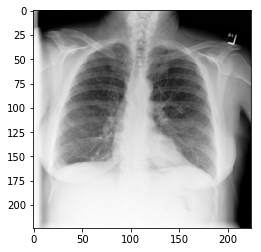

In [31]:
plt.imshow(sample[0], cmap="Greys_r");

In [32]:
labs

0.0

In [7]:
def get_label_images(d, num = 10):
    np.random.seed(10)
    site_0 = np.where(d.labels == 0)[0]
    site_1 = np.where(d.labels == 1)[0]

    img_0 = np.zeros((224, 224))
    img_1 = np.zeros((224, 224))

    np.random.shuffle(site_0)
    for i, idx in enumerate(site_0):
        e = d[idx]
        img_0 += e[0][0].numpy()
        if i > num:
            break
    np.random.shuffle(site_1)
    for i, idx in enumerate(site_1):
        e = d[idx]
        img_1 += e[0][0].numpy()
        if i > num:
            break
    
    return (img_0, img_1)

In [63]:
train_0, train_1 = get_label_images(datasets.xray.XRayDatasetTextDataset(d_nih, mode="train"))
valid_0, valid_1 = get_label_images(datasets.xray.XRayDatasetTextDataset(d_nih, mode="valid"))

Text(0.5, 1.0, 'valid label 1')

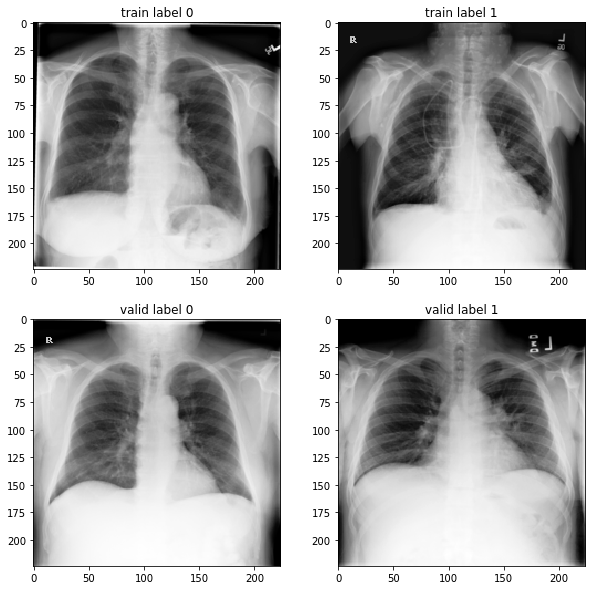

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2)

ax1.imshow(train_0, cmap="Greys_r")
ax1.set_title('train label 0')
ax2.imshow(train_1, cmap="Greys_r")
ax2.set_title('train label 1')
ax3.imshow(valid_0, cmap="Greys_r")
ax3.set_title('valid label 0')
ax4.imshow(valid_1, cmap="Greys_r")
ax4.set_title('valid label 1')

In [3]:
covid_train = datasets.xray.JointXRayCOVIDDataset(imgpath="../../../covid-chestxray-dataset/images/",
                                              csvpath="../../../covid-chestxray-dataset/metadata.csv",
                                              mode="train", verbose=True)

n_per_category=20
TRAIN: neg=20, pos=20
VALID: neg=10, pos=10
TEST: neg=10, pos=10


In [4]:
covid_valid = datasets.xray.JointXRayCOVIDDataset(imgpath="../../../covid-chestxray-dataset/images/",
                                              csvpath="../../../covid-chestxray-dataset/metadata.csv",
                                              mode="valid")

In [17]:
train_0, train_1 = get_label_images(covid_train)
valid_0, valid_1 = get_label_images(covid_valid)

Text(0.5, 1.0, 'valid label 1')

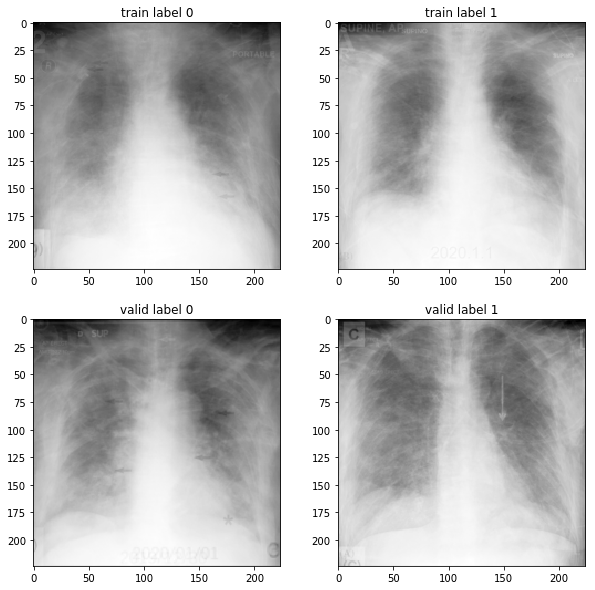

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2)

ax1.imshow(train_0, cmap="Greys_r")
ax1.set_title('train label 0')
ax2.imshow(train_1, cmap="Greys_r")
ax2.set_title('train label 1')
ax3.imshow(valid_0, cmap="Greys_r")
ax3.set_title('valid label 0')
ax4.imshow(valid_1, cmap="Greys_r")
ax4.set_title('valid label 1')

In [56]:
covid_train.dataset1.csv.groupby(["survival"]).count()

,index,patientid,offset,sex,age,finding,RT_PCR_positive,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
survival,,,,,,,,,,,,,,,,,,,,,
N,32,32,23,32,32,32,18,15,12,14,...,22,29,32,32,19,32,16,32,6,0
Y,142,142,129,132,128,142,91,67,76,69,...,112,138,142,142,62,142,98,134,61,0


In [57]:
covid_train.dataset2.csv.groupby(["survival"]).count()

,index,patientid,offset,sex,age,finding,RT_PCR_positive,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
survival,,,,,,,,,,,,,,,,,,,,,
N,20,20,17,20,16,20,17,7,7,17,...,17,19,20,20,14,20,9,16,9,0
Y,51,51,50,51,18,51,47,10,12,46,...,48,51,51,51,39,51,42,18,11,0


In [33]:
rsna_train = datasets.xray.JointXRayRSNADataset(imgpath=".",
                                              mode="train", verbose=True, ratio=0.5)

n_per_category=1348
TRAIN: neg=1348, pos=1348
VALID: neg=674, pos=674
TEST: neg=674, pos=674


In [39]:
rsna_valid = datasets.xray.JointXRayRSNADataset(imgpath=".",
                                              mode="valid", ratio=0.5)

In [34]:
train_0, train_1 = get_label_images(rsna_train, 300)
#valid_0, valid_1 = get_label_images(rsna_valid, 100)

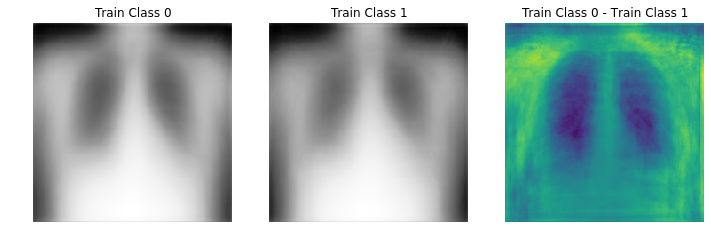

In [35]:
fig, ((ax1, ax2, ax3)) = plt.subplots(figsize=(10,10), nrows=1, ncols=3)
 
#, (ax4, ax5, ax6)
ax1.imshow(train_0, cmap="Greys_r")
ax1.set_title('Train Class 0')
ax1.axis('off')
ax2.imshow(train_1, cmap="Greys_r")
ax2.set_title('Train Class 1')
ax2.axis('off')

dif = train_0-train_1
ax3.imshow(dif, vmin=-50000,vmax=50000)
ax3.set_title('Train Class 0 - Train Class 1');
ax3.axis('off')

plt.tight_layout()

# ax4.imshow(valid_0, cmap="Greys_r")
# ax4.set_title('valid label 0')
# ax5.imshow(valid_1, cmap="Greys_r")
# ax5.set_title('valid label 1')

# ax6.imshow(valid_0-valid_1)
# ax6.set_title('valid_0-valid_1');



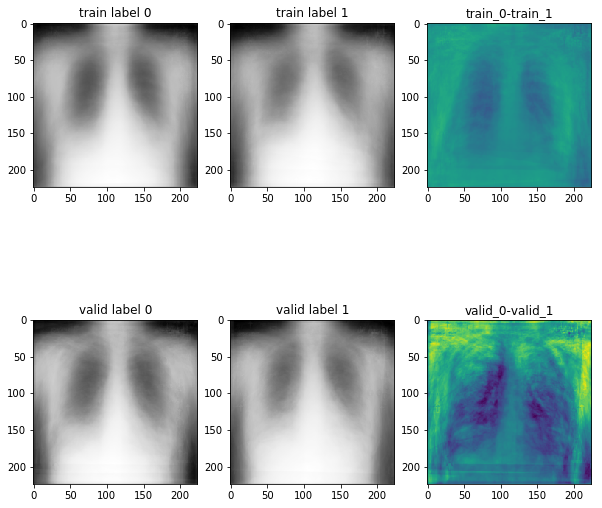

In [85]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(10,10), nrows=2, ncols=3)

ax1.imshow(train_0, cmap="Greys_r")
ax1.set_title('train label 0')
ax2.imshow(train_1, cmap="Greys_r")
ax2.set_title('train label 1')

dif = train_0-train_1
ax3.imshow(dif, vmin=-50000,vmax=50000)
ax3.set_title('train_0-train_1');



ax4.imshow(valid_0, cmap="Greys_r")
ax4.set_title('valid label 0')
ax5.imshow(valid_1, cmap="Greys_r")
ax5.set_title('valid label 1')

ax6.imshow(valid_0-valid_1)
ax6.set_title('valid_0-valid_1');



In [120]:
#rsna_train = datasets.xray.JointXRayRSNADataset(imgpath=".",mode="train", verbose=True, ratio=1.0)

In [121]:
rsna_train = datasets.xray.JointXRayRSNADataset(imgpath=".",mode="train", verbose=True, ratio=1.0)
site_0, site_1 = get_label_images(rsna_train, 300)

n_per_category=1348
TRAIN: neg=1348, pos=1348
VALID: neg=674, pos=674
TEST: neg=674, pos=674


In [122]:
rsna_train = datasets.xray.JointXRayRSNADataset(imgpath=".",mode="train", verbose=True, ratio=0.5)
train_0, train_1 = get_label_images(rsna_train, 300)
diff_05 = train_0-train_1

n_per_category=1348
TRAIN: neg=1348, pos=1348
VALID: neg=674, pos=674
TEST: neg=674, pos=674


In [123]:
rsna_train = datasets.xray.JointXRayRSNADataset(imgpath=".",mode="train", verbose=True, ratio=0.9)
train_0, train_1 = get_label_images(rsna_train, 300)
diff_09 = train_0-train_1

n_per_category=1348
TRAIN: neg=1347, pos=1347
VALID: neg=673, pos=673
TEST: neg=676, pos=676


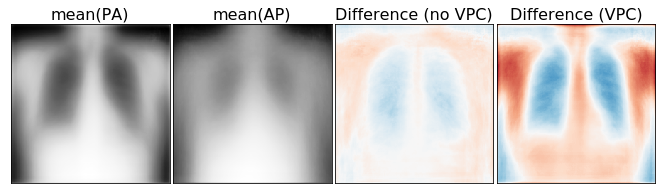

In [139]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(figsize=(8,15), nrows=1, ncols=4)
 
#, (ax4, ax5, ax6)
ax1.imshow(site_0, cmap="Greys_r")
ax1.set_title('mean(PA)', size=16);
ax1.set_yticks([])
ax1.set_xticks([])

ax2.imshow(site_1, cmap="Greys_r")
ax2.set_title('mean(AP)', size=16);
ax2.set_yticks([])
ax2.set_xticks([])

lim=np.max(np.abs(diff_09))
ax3.imshow(diff_05, vmin=-lim,vmax=lim, cmap="RdBu_r")
ax3.set_title('Difference (no VPC)', size=16);
ax3.set_yticks([])
ax3.set_xticks([])


ax4.imshow(diff_09, vmin=-lim,vmax=lim, cmap="RdBu_r")
ax4.set_title('Difference (VPC)', size=16);
ax4.set_yticks([])
ax4.set_xticks([])

plt.tight_layout(pad=-4.5)


In [73]:
# d_nih = xrv.datasets.NIH_Dataset(#imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/ChestXray-NIHCC/images",
#                                  ##imgpath="/lustre04/scratch/cohenjos/NIH/images-224",
#                                  #imgpath="/localscratch/cohenjos.10222373.0/NIH/images-224",
#                                  imgpath="/home/cohenjos/projects/def-marzyeh/cohenjos/NIH/images-224",
#                                 views=["PA","AP"], unique_patients=False)


In [141]:
d_train = datasets.xray.JointDataset(
      d1data="/home/cohenjos/projects/def-marzyeh/cohenjos/NIH/images-224",                    
      d1csv="/lustre03/project/6008064/jpcohen/ChestXray-NIHCC/Data_Entry_2017.csv",
      d2data="/home/cohenjos/projects/def-marzyeh/cohenjos/PC/images-224",
      d2csv="/lustre03/project/6008064/jpcohen/PADCHEST_SJ/labels_csv/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv",
      ratio=1.0,                                                                
      mode="train",
      new_size=224,
      seed=1234)
site_0, site_1 = get_label_images(d_train, 300)

In [142]:
d_train = datasets.xray.JointDataset(
      d1data="/home/cohenjos/projects/def-marzyeh/cohenjos/NIH/images-224",                    
      d1csv="/lustre03/project/6008064/jpcohen/ChestXray-NIHCC/Data_Entry_2017.csv",
      d2data="/home/cohenjos/projects/def-marzyeh/cohenjos/PC/images-224",
      d2csv="/lustre03/project/6008064/jpcohen/PADCHEST_SJ/labels_csv/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv",
      ratio=0.5,                                                                
      mode="train",
      new_size=224,
      seed=1234)
train_0, train_1 = get_label_images(d_train, 300)
diff_05 = train_0-train_1

In [143]:
d_train = datasets.xray.JointDataset(
      d1data="/home/cohenjos/projects/def-marzyeh/cohenjos/NIH/images-224",                    
      d1csv="/lustre03/project/6008064/jpcohen/ChestXray-NIHCC/Data_Entry_2017.csv",
      d2data="/home/cohenjos/projects/def-marzyeh/cohenjos/PC/images-224",
      d2csv="/lustre03/project/6008064/jpcohen/PADCHEST_SJ/labels_csv/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv",
      ratio=1.0,                                                                
      mode="train",
      new_size=224,
      seed=1234)
train_0, train_1 = get_label_images(d_train, 300)
diff_09 = train_0-train_1

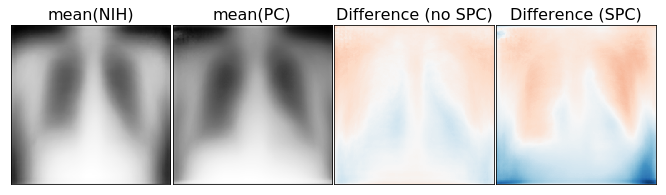

In [144]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(figsize=(8,15), nrows=1, ncols=4)
 
#, (ax4, ax5, ax6)
ax1.imshow(site_0, cmap="Greys_r")
ax1.set_title('mean(NIH)', size=16);
ax1.set_yticks([])
ax1.set_xticks([])
#ax1.set_ylabel('mean(NIH)', size=15)

ax2.imshow(site_1, cmap="Greys_r")
ax2.set_title('mean(PC)', size=16);
ax2.set_yticks([])
ax2.set_xticks([])
#ax2.set_ylabel('mean(PC)', size=15)

lim=np.max(np.abs(diff_09))
ax3.imshow(diff_05, vmin=-lim,vmax=lim, cmap="RdBu_r")
ax3.set_title('Difference (no SPC)', size=16);
ax3.set_yticks([])
ax3.set_xticks([])
#ax3.set_ylabel('Difference (no SPC)', size=15)


ax4.imshow(diff_09, vmin=-lim,vmax=lim, cmap="RdBu_r")
ax4.set_title('Difference (SPC)', size=16);
ax4.set_yticks([])
ax4.set_xticks([])
#ax4.set_ylabel('Difference (SPC)', size=15)

plt.tight_layout(pad=-4.5)


In [ ]:
ax4.s

In [26]:
sample = covid_train[15]
    

In [30]:
covid_train.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
covid_valid.labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [29]:
covid_train[15]

(tensor([[[ -826.7568,  -918.9318,  -914.7405,  ...,  -682.5804,
            -658.4616,  -610.7319],
          [ -916.2706, -1010.5251,  -975.7853,  ...,  -713.8978,
            -706.7854,  -643.8743],
          [ -871.0845,  -918.3605,  -863.7391,  ...,  -656.1102,
            -666.7607,  -613.9866],
          ...,
          [  294.5123,   367.6096,   419.4084,  ...,   266.5677,
             238.7432,   206.2551],
          [  292.0469,   373.5988,   426.3580,  ...,   255.0171,
             235.9786,   194.4098],
          [  274.6521,   344.8763,   380.3263,  ...,   218.6474,
             212.1165,   170.7205]]]), tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]), 1)

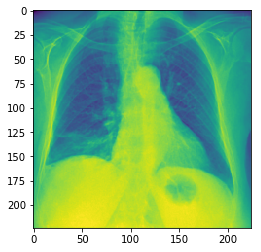

In [19]:
plt.imshow(sample[0][0])

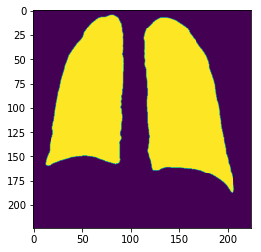

In [20]:
plt.imshow(sample[1][0])

In [14]:
# for i in range(len(covid_train)):
#     sample = covid_train[i]
#     plt.imshow(sample[1][0])
#     plt.show();

In [4]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

In [10]:
#RSNA_Pneumonia_Dataset
d_rsna = xrv.datasets.RSNA_Pneumonia_Dataset(imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/kaggle-pneumonia/stage_2_train_images_jpg", 
                                            views=["PA","AP"],
                                            pathology_masks=True,
                                            transform=transform)


In [11]:
d_rsna

{'Lung Opacity': {0.0: 20672, 1.0: 6012}, 'Pneumonia': {0.0: 20672, 1.0: 6012}}


RSNA_Pneumonia_Dataset num_samples=26684 views=['PA', 'AP']

In [19]:
d_rsna.csv.groupby(["ViewPosition","Target"]).count()

patientId     x     y  width  height  Unnamed: 0  \
ViewPosition Target                                                     
AP           0            7509     0     0      0       0        7509   
             1            4664  4664  4664   4664    4664        4664   
PA           0           13163     0     0      0       0       13163   
             1            1348  1348  1348   1348    1348        1348   

                     BodyPartExamined  ConversionType  Filename  \
ViewPosition Target                                               
AP           0                   7509            7509      7509   
             1                   4664            4664      4664   
PA           0                  13163           13163     13163   
             1                   1348            1348      1348   

                     InstanceNumber  Modality  PatientAge  PatientOrientation  \
ViewPosition Target                                                             
AP           0                 7509      7509        7509                   0   
             1                 4664      4664        4664                   0   
PA           0                13163     13163       13163                   0   
             1                 1348      1348        1348                   0   

                     PatientSex  PixelSpacing  SamplesPerPixel  SeriesNumber  \
ViewPosition Target                                                            
AP           0             7509          7509             7509          7509   
             1             4664          4664             4664          4664   
PA           0            13163         13163            13163         13163   
             1             1348          1348             1348          1348   

                     has_masks  
ViewPosition Target             
AP           0            7509  
             1            4664  
PA           0           13163  
             1            1348

In [21]:
d_rsna[0]["pathology_masks"]

{1: array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 0: array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)}